# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
from datetime import datetime, timedelta

from matplotlib import rc
rc("font", family = "AppleGothic")

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

# 데이터 불러오기

In [347]:
test = pd.read_excel("/Users/seoyoonchang/Desktop/종로구_대기오염_22_23.xlsx")

In [277]:
all_df = pd.read_csv("/Users/seoyoonchang/Desktop/visualisation_final.csv")

In [268]:
all_df

,datetime,SO2,CO,O3,NO2,PM10,stnNm,ta,rn,ws,...,dmstMtphNo,ts,year,month,day,hour,weekday,quarter,PM10_y,pm10_y_bin
0,2015-01-01 00:00:00,0.006,0.6,0.022,0.011,44.000000,서울,-7.40,0.0,6.1,...,0.0,-4.50,2015,1,1,0,3,1,44.0,1.0
1,2015-01-01 00:00:00,0.006,0.6,0.022,0.011,44.000000,서울,-7.40,0.0,6.1,...,0.0,-4.50,2015,1,1,0,3,1,21.0,2.0
2,2015-01-01 00:00:00,0.006,0.6,0.021,0.013,21.000000,서울,-8.65,0.0,3.2,...,0.0,-5.85,2015,1,1,0,3,1,44.0,1.0
3,2015-01-01 00:00:00,0.006,0.6,0.021,0.013,21.000000,서울,-8.65,0.0,3.2,...,0.0,-5.85,2015,1,1,0,3,1,21.0,1.0
4,2015-01-01 01:00:00,0.006,0.6,0.022,0.011,44.000000,서울,-7.40,0.0,4.7,...,0.0,-4.50,2015,1,1,1,3,1,44.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707045,2022-08-31 19:00:00,0.002,0.3,0.032,0.006,10.333333,강화,21.50,0.0,1.2,...,0.0,23.40,2022,8,31,19,2,3,5.0,1.0
707046,2022-08-31 20:00:00,0.003,0.3,0.029,0.005,13.000000,강화,20.50,0.0,0.9,...,0.0,22.50,2022,8,31,20,2,3,10.0,1.0
707047,2022-08-31 21:00:00,0.002,0.3,0.028,0.006,13.000000,강화,20.40,0.0,0.9,...,0.0,22.10,2022,8,31,21,2,3,10.0,1.0
707048,2022-08-31 22:00:00,0.003,0.3,0.021,0.006,19.000000,강화,20.50,0.0,0.6,...,0.0,22.30,2022,8,31,22,2,3,8.0,1.0


In [283]:
df = all_df[all_df["stnNm"] == "서울"]

In [343]:
df

,datetime,SO2,CO,O3,NO2,PM10,stnNm,ta,rn,ws,...,day,hour,weekday,quarter,PM10_y,pm10_y_bin,good,normal,bad,verybad
0,2015-01-01 00:00:00,0.006,0.6,0.022,0.011,44.0,서울,-7.40,0.0,6.1,...,1,0,3,1,44.0,1.0,1,0,0,0
1,2015-01-01 00:00:00,0.006,0.6,0.022,0.011,44.0,서울,-7.40,0.0,6.1,...,1,0,3,1,21.0,2.0,0,1,0,0
2,2015-01-01 00:00:00,0.006,0.6,0.021,0.013,21.0,서울,-8.65,0.0,3.2,...,1,0,3,1,44.0,1.0,1,0,0,0
3,2015-01-01 00:00:00,0.006,0.6,0.021,0.013,21.0,서울,-8.65,0.0,3.2,...,1,0,3,1,21.0,1.0,1,0,0,0
4,2015-01-01 01:00:00,0.006,0.6,0.022,0.011,44.0,서울,-7.40,0.0,4.7,...,1,1,3,1,44.0,1.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75595,2022-08-31 19:00:00,0.002,0.3,0.030,0.018,5.0,서울,23.50,0.0,2.0,...,31,19,2,3,5.0,NaN,0,0,0,0
75596,2022-08-31 20:00:00,0.002,0.4,0.021,0.023,10.0,서울,22.40,0.0,2.0,...,31,20,2,3,10.0,NaN,0,0,0,0
75597,2022-08-31 21:00:00,0.002,0.4,0.012,0.030,10.0,서울,21.70,0.0,1.6,...,31,21,2,3,10.0,NaN,0,0,0,0
75598,2022-08-31 22:00:00,0.002,0.4,0.009,0.030,8.0,서울,21.10,0.0,1.0,...,31,22,2,3,8.0,NaN,0,0,0,0


# 미세먼지(종속변수) 분석

## Groupby Year (Mean)

In [284]:
groupbyYear_mean = df.groupby("year").mean()

In [285]:
groupbyYear_mean.reset_index(inplace = True)

## 연도별 평균 미세먼지 농도

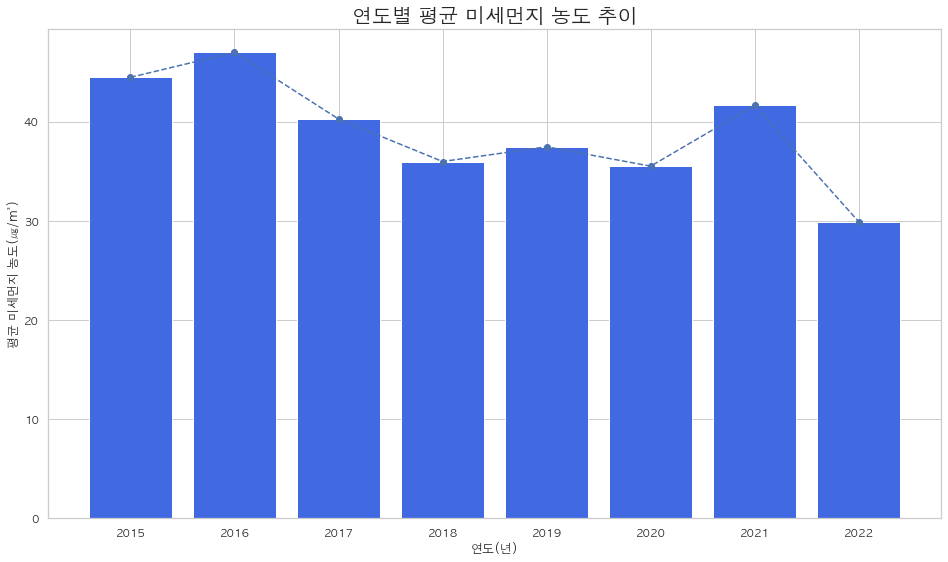

In [286]:
plt.figure(figsize = (16,9))

plt.bar(groupbyYear_mean["year"],groupbyYear_mean["PM10"], color = "royalblue")

plt.title("연도별 평균 미세먼지 농도 추이", size = 20)

plt.xlabel("연도(년)", size = 12)
plt.ylabel("평균 미세먼지 농도(㎍/m³)", size = 12)

plt.plot(groupbyYear_mean["year"],groupbyYear_mean["PM10"], color='b',
         linestyle='--', marker='o')

plt.show()

## Groupby Year (Sum)

In [287]:
groupbyYear_sum = df.groupby("year").sum()

In [288]:
groupbyYear_sum.reset_index(inplace = True)

## (종속변수 별) 연도별 평균 미세먼지 일수

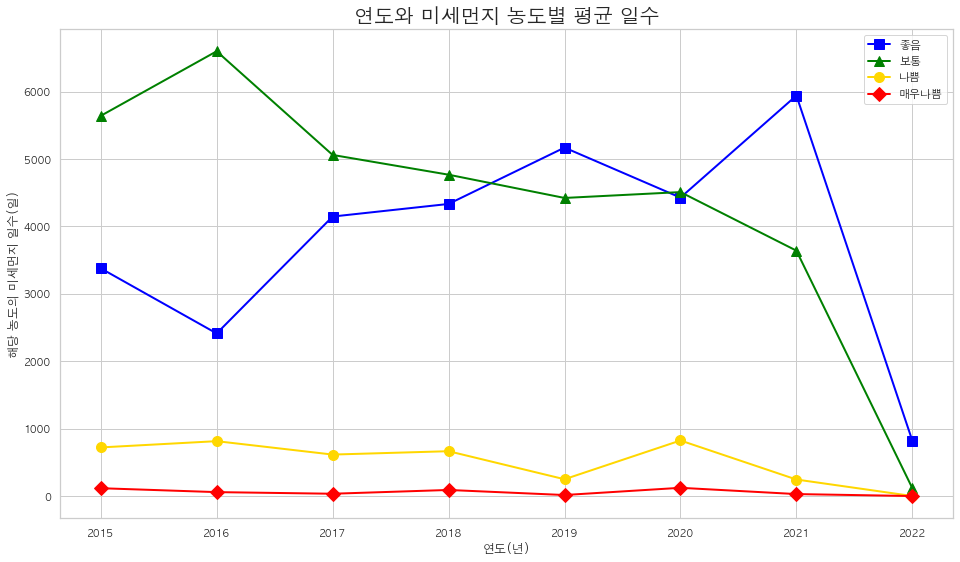

In [289]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(1,1,1)

plt.plot(groupbyYear_sum["year"],groupbyYear_sum["good"], marker = 's', markersize = 10, 
         markerfacecolor = "blue", color = "blue", linewidth = 2, label = "좋음")

plt.plot(groupbyYear_sum["year"], groupbyYear_sum["normal"], marker = '^', markersize = 10, 
         markerfacecolor = "green", color = "green", linewidth = 2, label = "보통")

plt.plot(groupbyYear_sum["year"], groupbyYear_sum["bad"], marker = 'o', markersize = 10, 
         markerfacecolor = "gold", color = "gold", linewidth = 2, label = "나쁨")

plt.plot(groupbyYear_sum["year"], groupbyYear_sum["verybad"], marker = 'D', markersize = 10, 
         markerfacecolor = "red", color = "red", linewidth = 2, label = "매우나쁨")

ax.legend(loc="best")

# 차트 제목 추가
ax.set_title("연도와 미세먼지 농도별 평균 일수", size = 20)

# 축 이름 추가
ax.set_xlabel("연도(년)", size = 12)
ax.set_ylabel("해당 농도의 미세먼지 일수(일)", size = 12)


#축 눈금 라벨 크기
ax.tick_params(axis = "x", labelsize = 10)
ax.tick_params(axis = "y", labelsize = 10)

plt.show()

## (종속변수 - 나쁨, 매우나쁨) 연도별 미세먼지 평균 일수

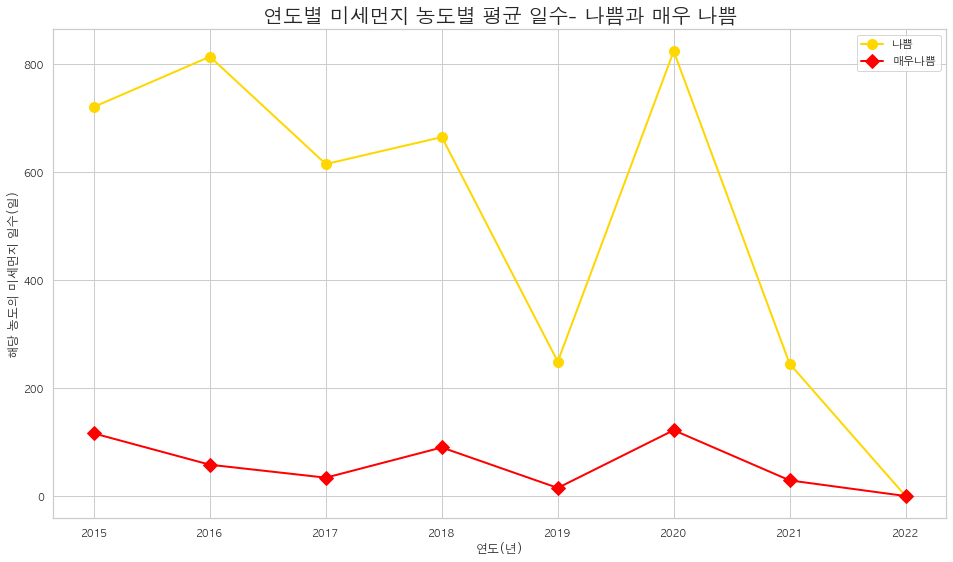

In [290]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(1,1,1)

plt.plot(groupbyYear_sum["year"], groupbyYear_sum["bad"], marker = 'o', markersize = 10, 
         markerfacecolor = "gold", color = "gold", linewidth = 2, label = "나쁨")

plt.plot(groupbyYear_sum["year"], groupbyYear_sum["verybad"], marker = 'D', markersize = 10, 
         markerfacecolor = "red", color = "red", linewidth = 2, label = "매우나쁨")

ax.legend(loc="best")

# 차트 제목 추가
ax.set_title("연도별 미세먼지 농도별 평균 일수- 나쁨과 매우 나쁨", size = 20)

# 축 이름 추가
ax.set_xlabel("연도(년)", size = 12)
ax.set_ylabel("해당 농도의 미세먼지 일수(일)", size = 12)


#축 눈금 라벨 크기
ax.tick_params(axis = "x", labelsize = 10)
ax.tick_params(axis = "y", labelsize = 10)

plt.show()

## Groupby Year+Quarter (Sum)

In [291]:
groupbyYearQuarter_sum = df.groupby(["year","quarter"]).sum()

In [292]:
groupbyYearQuarter_sum.reset_index(inplace = True)

In [294]:
spring = groupbyYearQuarter_sum[groupbyYearQuarter_sum["quarter"] == 1]
summer = groupbyYearQuarter_sum[groupbyYearQuarter_sum["quarter"] == 2]
fall = groupbyYearQuarter_sum[groupbyYearQuarter_sum["quarter"] == 3]
winter = groupbyYearQuarter_sum[groupbyYearQuarter_sum["quarter"] == 4]

## 연도와 분기별 미세먼지 농도별 평균 일수

### 매우 나쁨

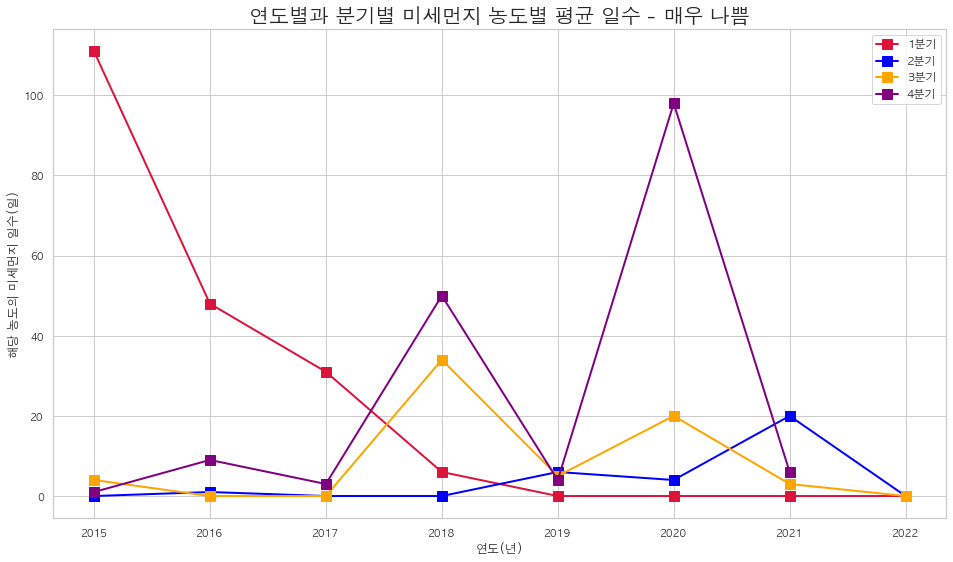

In [295]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(1,1,1)

plt.plot(spring["year"], spring["verybad"], marker = 's', markersize = 10, 
         markerfacecolor = "crimson", color = "crimson", linewidth = 2, label = "1분기")

plt.plot(summer["year"], summer["verybad"], marker = 's', markersize = 10, 
         markerfacecolor = "blue", color = "blue", linewidth = 2, label = "2분기")

plt.plot(fall["year"], fall["verybad"], marker = 's', markersize = 10, 
         markerfacecolor = "orange", color = "orange", linewidth = 2, label = "3분기")

plt.plot(winter["year"], winter["verybad"], marker = 's', markersize = 10, 
         markerfacecolor = "purple", color = "purple", linewidth = 2, label = "4분기")

ax.legend(loc="best")

# 차트 제목 추가
ax.set_title("연도별과 분기별 미세먼지 농도별 평균 일수 - 매우 나쁨", size = 20)

# 축 이름 추가
ax.set_xlabel("연도(년)", size = 12)
ax.set_ylabel("해당 농도의 미세먼지 일수(일)", size = 12)


#축 눈금 라벨 크기
ax.tick_params(axis = "x", labelsize = 10)
ax.tick_params(axis = "y", labelsize = 10)

plt.show()

### 나쁨

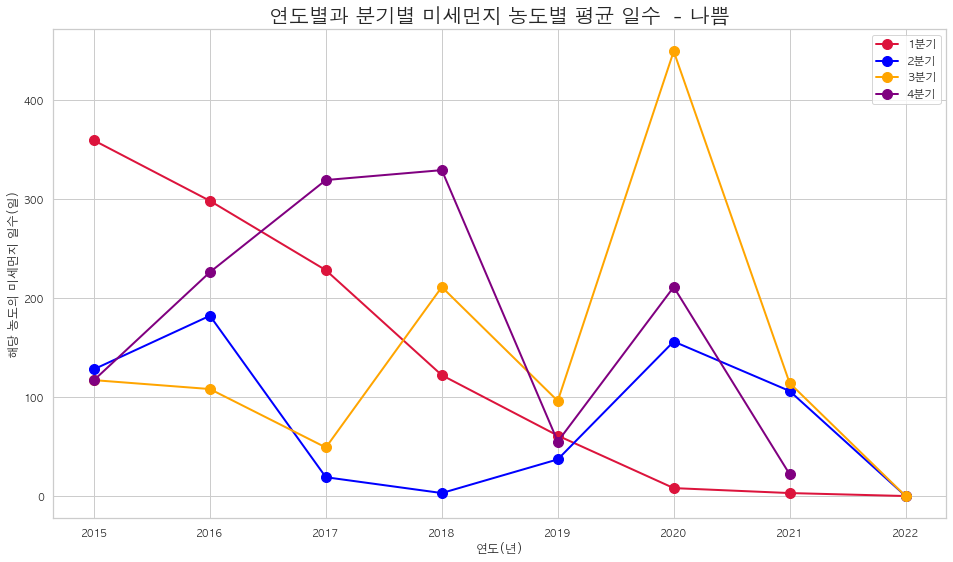

In [296]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(1,1,1)

plt.plot(spring["year"], spring["bad"], marker = 'o', markersize = 10, 
         markerfacecolor = "crimson", color = "crimson", linewidth = 2, label = "1분기")

plt.plot(summer["year"], summer["bad"], marker = 'o', markersize = 10, 
         markerfacecolor = "blue", color = "blue", linewidth = 2, label = "2분기")

plt.plot(fall["year"], fall["bad"], marker = 'o', markersize = 10, 
         markerfacecolor = "orange", color = "orange", linewidth = 2, label = "3분기")

plt.plot(winter["year"], winter["bad"], marker = 'o', markersize = 10, 
         markerfacecolor = "purple", color = "purple", linewidth = 2, label = "4분기")

ax.legend(loc="best")

# 차트 제목 추가
ax.set_title("연도별과 분기별 미세먼지 농도별 평균 일수  - 나쁨", size = 20)

# 축 이름 추가
ax.set_xlabel("연도(년)", size = 12)
ax.set_ylabel("해당 농도의 미세먼지 일수(일)", size = 12)


#축 눈금 라벨 크기
ax.tick_params(axis = "x", labelsize = 10)
ax.tick_params(axis = "y", labelsize = 10)

plt.show()

### 보통

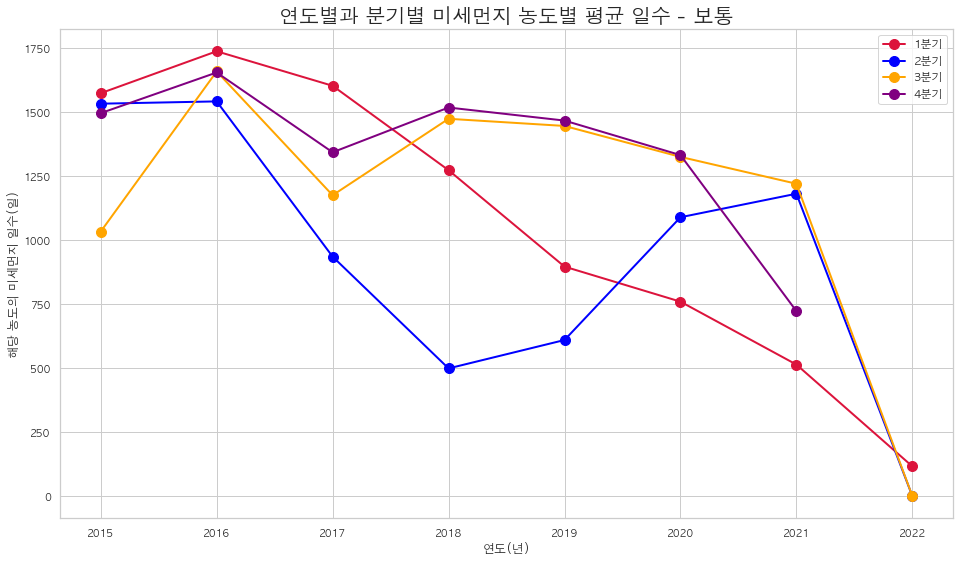

In [297]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(1,1,1)

plt.plot(spring["year"], spring["normal"], marker = 'o', markersize = 10, 
         markerfacecolor = "crimson", color = "crimson", linewidth = 2, label = "1분기")

plt.plot(summer["year"], summer["normal"], marker = 'o', markersize = 10, 
         markerfacecolor = "blue", color = "blue", linewidth = 2, label = "2분기")

plt.plot(fall["year"], fall["normal"], marker = 'o', markersize = 10, 
         markerfacecolor = "orange", color = "orange", linewidth = 2, label = "3분기")

plt.plot(winter["year"], winter["normal"], marker = 'o', markersize = 10, 
         markerfacecolor = "purple", color = "purple", linewidth = 2, label = "4분기")

ax.legend(loc="best")

# 차트 제목 추가
ax.set_title("연도별과 분기별 미세먼지 농도별 평균 일수 - 보통", size = 20)

# 축 이름 추가
ax.set_xlabel("연도(년)", size = 12)
ax.set_ylabel("해당 농도의 미세먼지 일수(일)", size = 12)


#축 눈금 라벨 크기
ax.tick_params(axis = "x", labelsize = 10)
ax.tick_params(axis = "y", labelsize = 10)

plt.show()

### 좋음

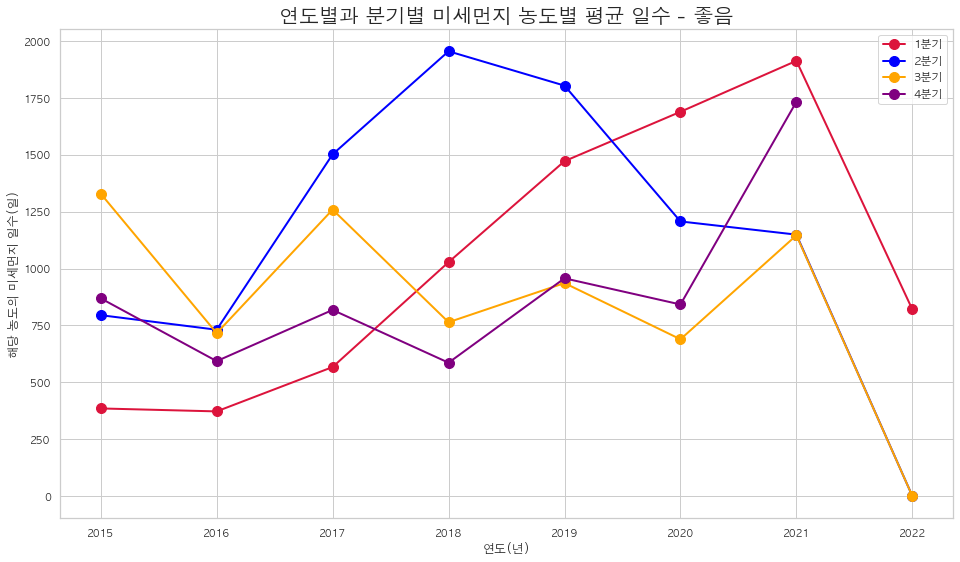

In [298]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(1,1,1)

plt.plot(spring["year"], spring["good"], marker = 'o', markersize = 10, 
         markerfacecolor = "crimson", color = "crimson", linewidth = 2, label = "1분기")

plt.plot(summer["year"], summer["good"], marker = 'o', markersize = 10, 
         markerfacecolor = "blue", color = "blue", linewidth = 2, label = "2분기")

plt.plot(fall["year"], fall["good"], marker = 'o', markersize = 10, 
         markerfacecolor = "orange", color = "orange", linewidth = 2, label = "3분기")

plt.plot(winter["year"], winter["good"], marker = 'o', markersize = 10, 
         markerfacecolor = "purple", color = "purple", linewidth = 2, label = "4분기")

ax.legend(loc="best")

# 차트 제목 추가
ax.set_title("연도별과 분기별 미세먼지 농도별 평균 일수 - 좋음", size = 20)

# 축 이름 추가
ax.set_xlabel("연도(년)", size = 12)
ax.set_ylabel("해당 농도의 미세먼지 일수(일)", size = 12)


#축 눈금 라벨 크기
ax.tick_params(axis = "x", labelsize = 10)
ax.tick_params(axis = "y", labelsize = 10)

plt.show()

## Groupby 측정소명 (mean)

In [302]:
all_df["stnNm"].unique()

array(['서울', '동두천', '수원', '양평', '이천', '파주', '백령도', '인천', '강화'],
      dtype=object)

In [303]:
groupbyStation_mean = all_df.groupby("stnNm").mean()

In [304]:
groupbyStation_mean

,SO2,CO,O3,NO2,PM10,ta,rn,ws,wd,hm,...,day,hour,weekday,quarter,PM10_y,pm10_y_bin,good,normal,bad,verybad
stnNm,,,,,,,,,,,,,,,,,,,,,
강화,0.004387,0.357330,0.032753,0.008797,40.075169,11.828317,0.125839,1.969493,180.388771,68.869325,...,15.728571,10.222222,3.000000,2.454286,39.433380,1.633836,0.438545,0.495767,0.058995,0.006693
동두천,0.004234,0.425480,0.028965,0.015778,45.152064,11.965881,0.146800,1.458553,167.033377,66.681634,...,15.728571,10.222222,3.000000,2.454286,39.433380,1.633836,0.438545,0.495767,0.058995,0.006693
백령도,0.002820,0.386073,0.045391,0.006269,35.336099,11.905459,0.101143,4.017737,217.766390,73.600172,...,15.731345,10.435364,2.999022,2.464733,38.717643,1.613408,0.456010,0.481164,0.056235,0.006592
서울,0.003807,0.507133,0.024773,0.030920,39.433380,13.341726,0.140352,2.197144,194.811598,60.967782,...,15.728571,10.222222,3.000000,2.454286,39.433380,1.634655,0.405106,0.459683,0.054669,0.006138
수원,0.003521,0.576549,0.023344,0.028569,45.169328,13.043733,0.142561,1.799162,185.639484,70.360793,...,15.728571,10.222222,3.000000,2.454286,39.433380,1.633836,0.438545,0.495767,0.058995,0.006693
양평,0.003521,0.576549,0.023344,0.028569,45.169328,12.515238,0.144089,1.395748,181.759580,67.393314,...,15.728571,10.222222,3.000000,2.454286,39.433380,1.633836,0.438545,0.495767,0.058995,0.006693
이천,0.003920,0.450496,0.027772,0.019891,45.730214,12.256527,0.139078,1.271774,153.335850,67.136577,...,15.728571,10.222222,3.000000,2.454286,39.433380,1.633836,0.438545,0.495767,0.058995,0.006693
인천,0.007010,0.492452,0.027264,0.028587,49.499227,12.946320,0.124597,3.008996,213.455701,68.842130,...,15.728571,10.222222,3.000000,2.454286,39.433380,1.633836,0.438545,0.495767,0.058995,0.006693
파주,0.003309,0.584182,0.027580,0.021245,49.597025,11.031352,0.134835,1.398759,138.128649,73.260838,...,15.728571,10.222222,3.000000,2.454286,39.433380,1.633836,0.438545,0.495767,0.058995,0.006693


## 지역별 미세먼지 농도

# 전체 독립 변수들 간의 상관관계 확인

In [308]:
# 서울 데이터 다운로드
all_df_cor = pd.read_csv("/Users/seoyoonchang/Desktop/all_df_visualisation.csv")

In [309]:
all_df_cor.columns

Index(['지역', '측정소명', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'datetime',
       'quarter', '3h', 'ta', 'rn', 'ws', 'wd', 'hm', 'pv', 'td', 'pa', 'ps',
       'ss', 'icsr', 'dsnw', 'dc10Tca', 'dc10LmcsCa', 'lcsCh', 'vs',
       'dmstMtphNo', 'ts', 'm005Te', 'm01Te', 'm02Te', 'm03Te', 'PM10_y',
       'year', 'month', 'day', 'hour', 'weekday', 'pm10_y_bin', 'good',
       'normal', 'bad', 'verybad'],
      dtype='object')

In [310]:
all_df_cor = all_df_cor[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '3h', "quarter",
          'ta', 'rn', 'ws', 'wd', 'hm', 'pv', 'td', 'pa', 'ps',
       'ss', 'icsr', 'dsnw', 'dc10Tca', 'dc10LmcsCa', 'lcsCh', 'vs',
       'dmstMtphNo', 'ts', 'm005Te', 'm01Te', 'm02Te', 'm03Te']].corr(method = "kendall")

/Users/seoyoonchang/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:5215: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


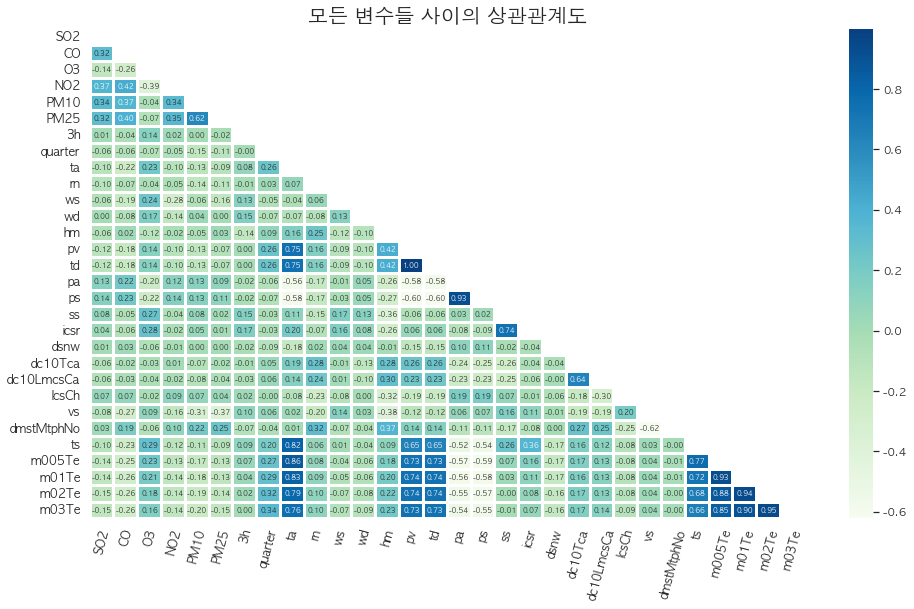

In [311]:
plt.figure(figsize=(16,9))

matrix = np.triu(all_df_cor)

sns.heatmap(all_df_cor,
           annot = True,
           fmt = '.2f', 
           cmap = "GnBu",
           cbar = True,
           annot_kws={"size": 7},
           mask = matrix,
           linewidths = 2,
           linecolor = "white"
           )

plt.title("모든 변수들 사이의 상관관계도", fontsize = 20)

plt.yticks(
    fontsize = 12,
    rotation = "horizontal"
)


plt.xticks(
    fontsize = 12,
    rotation = 75
)
    
plt.show()

# 서울 기상관측 데이터 분석

## 기상 관측 변수 전체 상관도

In [314]:
all_df_cor_w = all_df_cor[['quarter', '3h', 'ta', 'rn', 'ws', 'wd', 'hm', 'pv', 'td', 'pa', 'ps',
       'ss', 'icsr', 'dsnw', 'dc10Tca', 'dc10LmcsCa', 'lcsCh', 'vs',
       'dmstMtphNo', 'ts']].corr(method = "kendall")

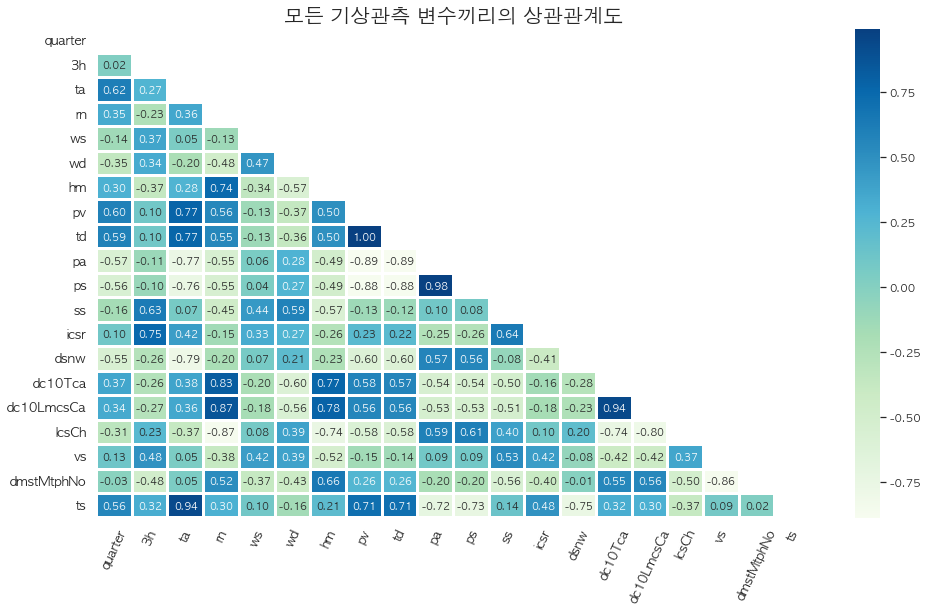

In [315]:
plt.figure(figsize=(16,9))

matrix = np.triu(all_df_cor_w)

sns.heatmap(all_df_cor_w,
           annot = True,
           fmt = '.2f', 
           cmap = "GnBu",
           cbar = True,
           annot_kws={"size": 10},
           mask = matrix,
           linewidths = 2,
           linecolor = "white"
           )

plt.title("모든 기상관측 변수끼리의 상관관계도", fontsize =20)

plt.yticks(
    fontsize = 13,
    rotation = "horizontal"
)


plt.xticks(
    fontsize = 13,
    rotation = 65
)
    
plt.show()

## 기온에 따른 PM10

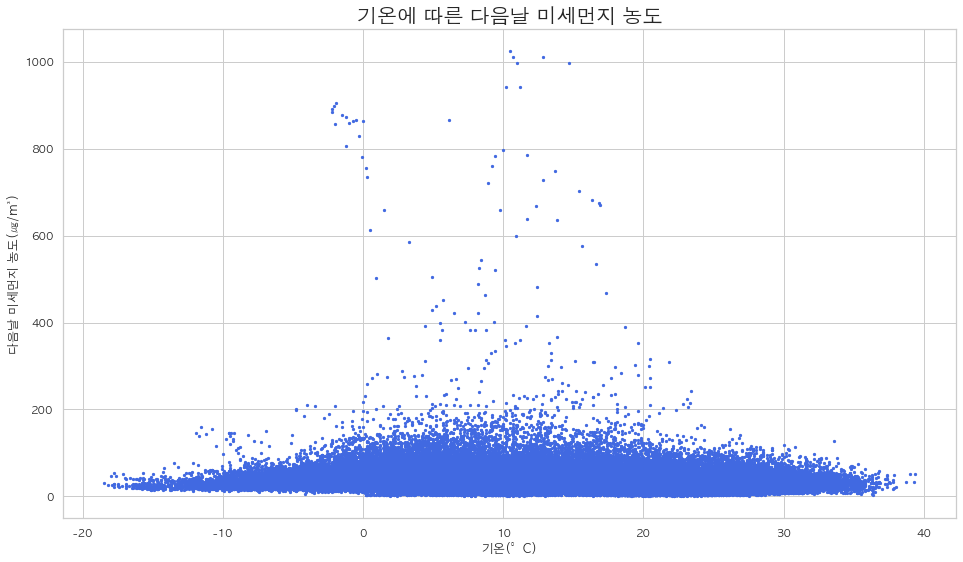

In [316]:
plt.figure(figsize = (16,9))

plt.scatter(x = "ta", y = "PM10_y", data = df, s = 5, color = "royalblue")

plt.title("기온에 따른 다음날 미세먼지 농도", fontsize = 20)

plt.xlabel("기온(°C)")
plt.ylabel("다음날 미세먼지 농도(㎍/m³)")
plt.show()

## 이슬점온도에 따른 PM10의 변화

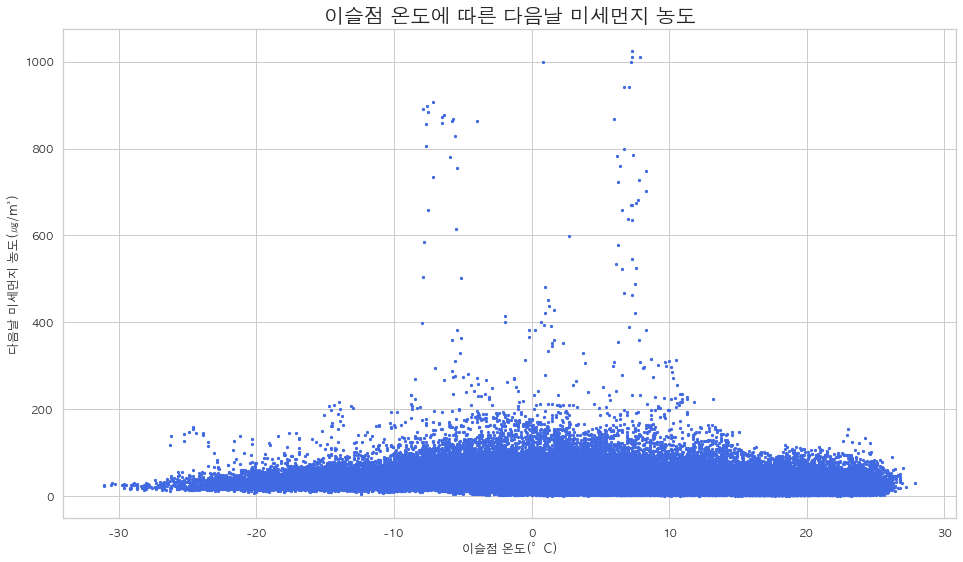

In [317]:
plt.figure(figsize = (16,9))

plt.scatter(x = "td", y = "PM10_y", data = df, s = 5, color = "royalblue")

plt.title("이슬점 온도에 따른 다음날 미세먼지 농도", fontsize = 20)

plt.xlabel("이슬점 온도(°C)")
plt.ylabel("다음날 미세먼지 농도(㎍/m³)")

plt.show()

## 습도에 따른 PM10의 변화

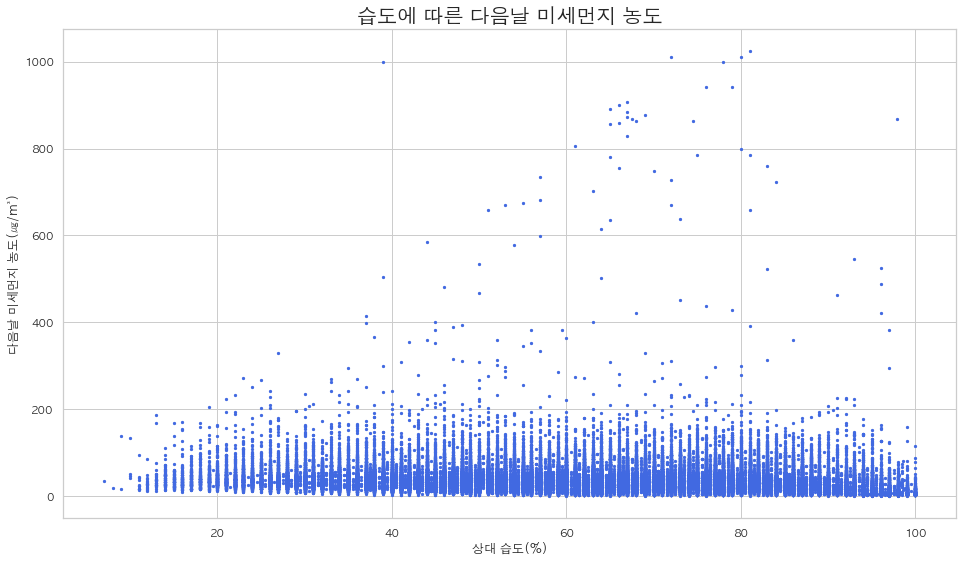

In [318]:
plt.figure(figsize = (16,9))

plt.scatter(x = "hm", y = "PM10_y", data = df, s = 5, color = "royalblue")

plt.title("습도에 따른 다음날 미세먼지 농도", fontsize = 20)

plt.xlabel("상대 습도(%)")
plt.ylabel("다음날 미세먼지 농도(㎍/m³)")
plt.show()


## 강수량, 적설량에 따른 PM10 분포

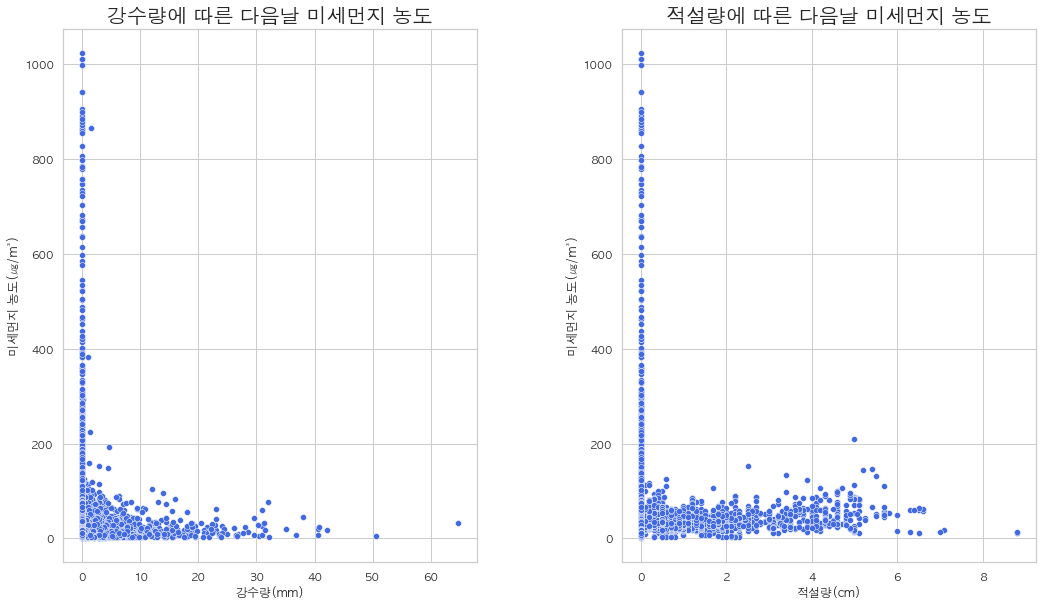

In [319]:
fig, axes = plt.subplots(ncols=2)
plt.tight_layout()
fig.set_size_inches(16, 9)

sns.scatterplot(x = "rn", y = "PM10_y", data = df, ax = axes[0], color = "royalblue")
sns.scatterplot(x = "dsnw", y = "PM10_y", data = df, ax = axes[1], color = "royalblue")

axes[0].set(title = "강수량에 따른 다음날 미세먼지 농도")
axes[0].title.set_size(20)
axes[1].set(title = "적설량에 따른 다음날 미세먼지 농도")
axes[1].title.set_size(20)

axes[0].set_xlabel("강수량(mm)")
axes[0].set_ylabel("미세먼지 농도(㎍/m³)")

axes[1].set_xlabel("적설량(cm)")
axes[1].set_ylabel("미세먼지 농도(㎍/m³)")

plt.show()

## 분기별 풍속, 풍향과 pm10

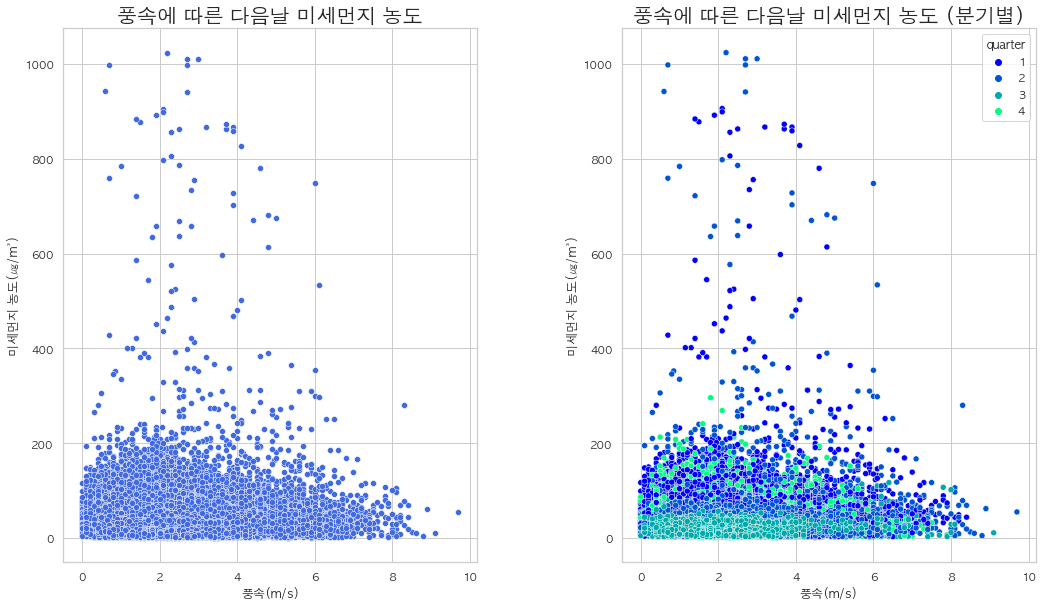

In [320]:
fig, axes = plt.subplots(ncols = 2)
plt.tight_layout()
fig.set_size_inches(16, 9)

sns.scatterplot(x = "ws", y = "PM10_y", data = df, ax = axes[0], color = "royalblue")
sns.scatterplot(x = "ws", y = "PM10_y", hue = "quarter", data = df, ax = axes[1], palette="winter")


axes[0].set(title = "풍속에 따른 다음날 미세먼지 농도")
axes[0].title.set_size(20)
axes[0].set_xlabel("풍속(m/s)")
axes[0].set_ylabel("미세먼지 농도(㎍/m³)")

axes[1].set(title = "풍속에 따른 다음날 미세먼지 농도 (분기별)")
axes[1].title.set_size(20)
axes[1].set_xlabel("풍속(m/s)")
axes[1].set_ylabel("미세먼지 농도(㎍/m³)")



plt.show()

## 분기별 풍향과 pm10

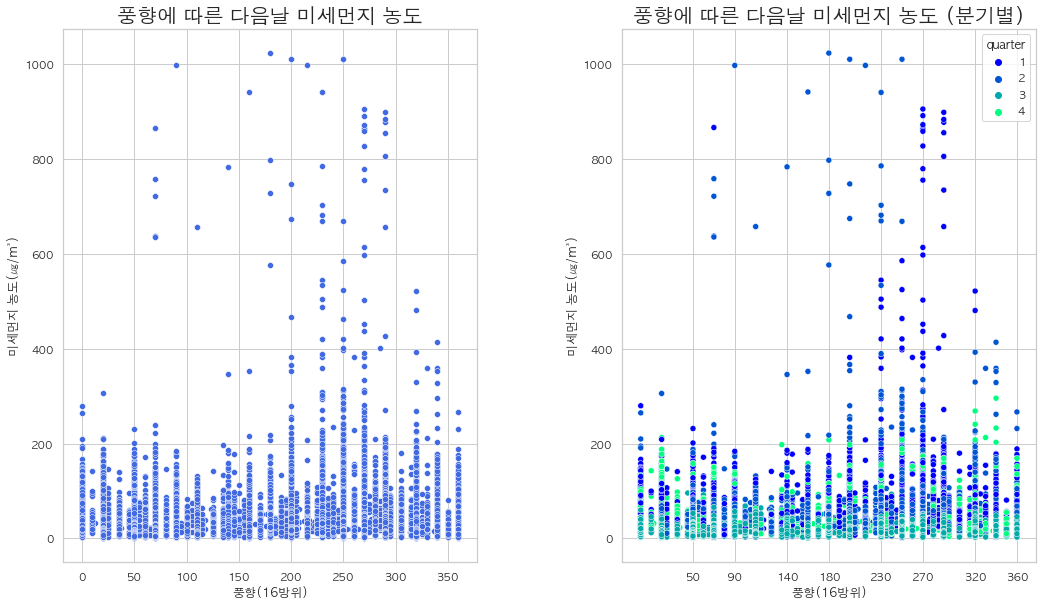

In [321]:
fig, axes = plt.subplots(ncols = 2)
plt.tight_layout()
fig.set_size_inches(16, 9)

sns.scatterplot(x = "wd", y = "PM10_y", data = df, ax = axes[0], color = "royalblue")
plt.xticks(ticks = [50, 90, 140, 180, 230, 270, 320, 360])
sns.scatterplot(x = "wd", y = "PM10_y", hue = "quarter", data = df, ax = axes[1], palette = "winter")
plt.xticks(ticks = [50, 90, 140, 180, 230, 270, 320, 360])

axes[0].set(title = "풍향에 따른 다음날 미세먼지 농도")
axes[0].title.set_size(20)
axes[1].set(title = "풍향에 따른 다음날 미세먼지 농도 (분기별)")
axes[1].title.set_size(20)

axes[0].set_xlabel("풍향(16방위)")
axes[0].set_ylabel("미세먼지 농도(㎍/m³)")

axes[1].set_xlabel("풍향(16방위)")
axes[1].set_ylabel("미세먼지 농도(㎍/m³)")

plt.show()

## 분기별 기압과 PM10_y

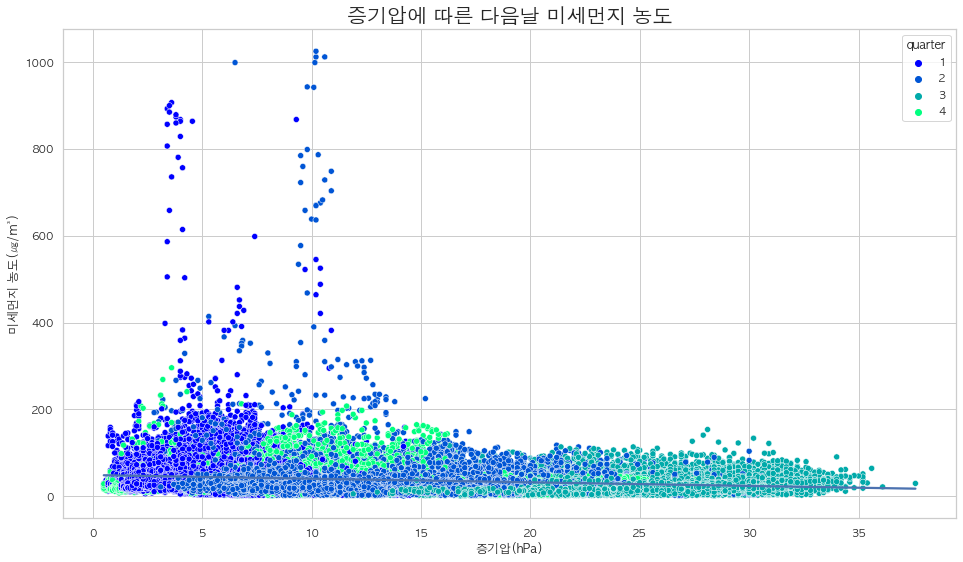

In [322]:
plt.figure(figsize = (16,9))

sns.scatterplot(x = "pv", y = "PM10_y", hue = "quarter", data = df, palette = "winter")
sns.regplot(x = "pv", y = "PM10_y", data = df, scatter = False)

plt.title("증기압에 따른 다음날 미세먼지 농도", fontsize = 20)

plt.xlabel("증기압(hPa)")
plt.ylabel("미세먼지 농도(㎍/m³)")

plt.show()

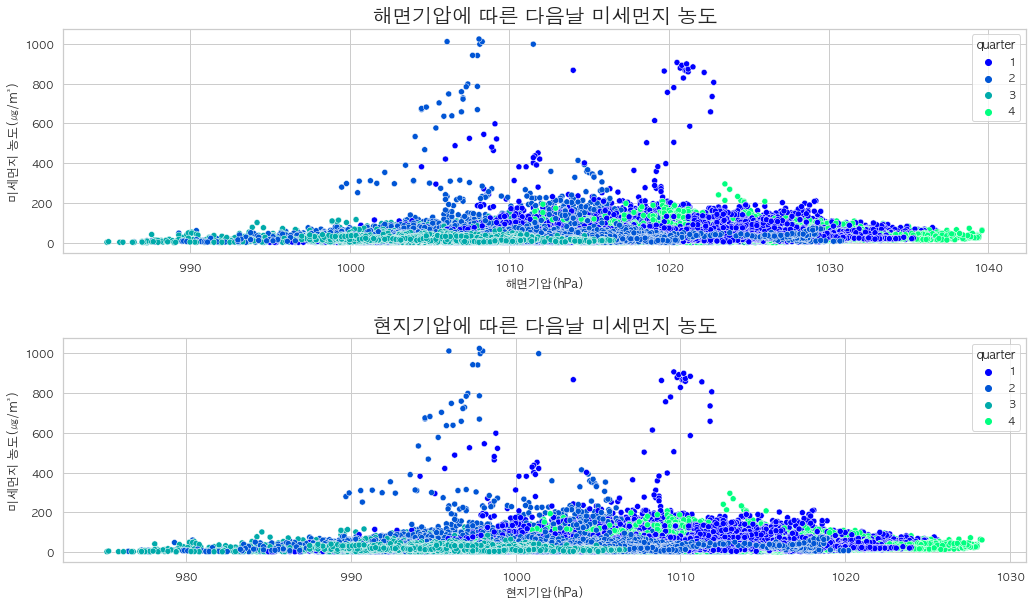

In [323]:
fig, axes = plt.subplots(ncols = 1, nrows = 2)
plt.tight_layout()
fig.set_size_inches(16,9)

sns.scatterplot(x = "ps", y = "PM10_y", hue = "quarter", data = df, ax = axes[0], palette = "winter")
sns.scatterplot(x = "pa", y = "PM10_y", hue = "quarter", data = df, ax = axes[1], palette = "winter")

axes[0].set(title = "해면기압에 따른 다음날 미세먼지 농도")
axes[0].title.set_size(20)
axes[0].set_xlabel("해면기압(hPa)")
axes[0].set_ylabel("미세먼지 농도(㎍/m³)")

axes[1].set(title = "현지기압에 따른 다음날 미세먼지 농도")
axes[1].title.set_size(20)
axes[1].set_xlabel("현지기압(hPa)")
axes[1].set_ylabel("미세먼지 농도(㎍/m³)")

plt.show()

## 분별 일조량과 PM10_y, 분기별 일사량과 PM10_y

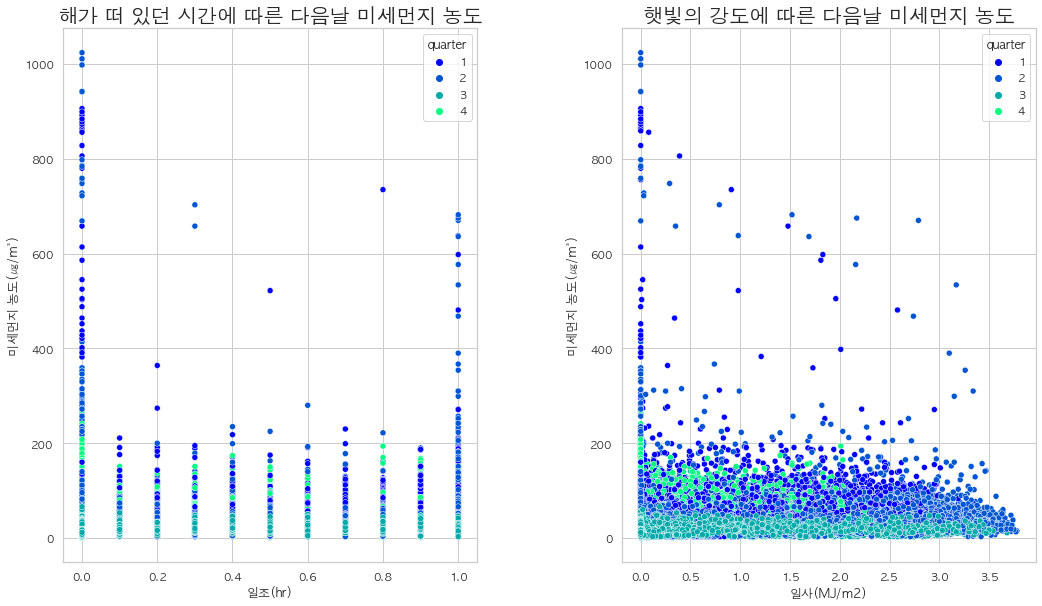

In [324]:
fig, axes = plt.subplots(ncols = 2)
plt.tight_layout()
fig.set_size_inches(16, 9)

sns.scatterplot(x = "ss", y = "PM10_y", hue = "quarter", data = df, ax = axes[0], palette = "winter")
sns.scatterplot(x = "icsr", y = "PM10_y", hue = "quarter", data = df, ax = axes[1], palette = "winter")

axes[0].set(title = "해가 떠 있던 시간에 따른 다음날 미세먼지 농도")
axes[0].title.set_size(20)
axes[1].set(title = "햇빛의 강도에 따른 다음날 미세먼지 농도")
axes[1].title.set_size(20)

axes[0].set_xlabel("일조(hr)")
axes[0].set_ylabel("미세먼지 농도(㎍/m³)")

axes[1].set_xlabel("일사(MJ/m2)")
axes[1].set_ylabel("미세먼지 농도(㎍/m³)")

plt.show()

## 전운량, 중하층운량, 최저운고와 PM10_y

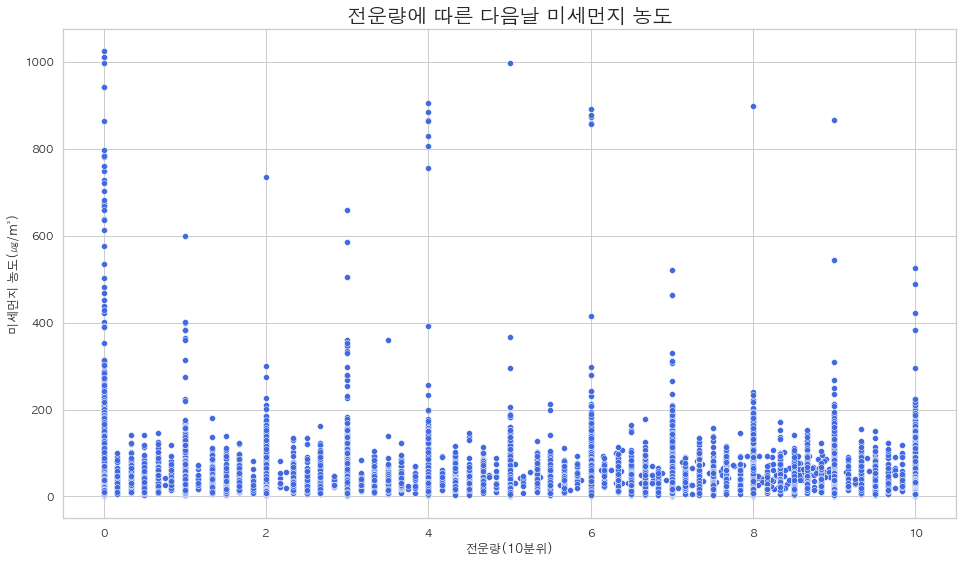

In [325]:
plt.figure(figsize = (16,9))

sns.scatterplot(x = "dc10Tca", y = "PM10_y", data = df, color = "royalblue")

plt.title("전운량에 따른 다음날 미세먼지 농도", fontsize = 20)

plt.xlabel("전운량(10분위)")
plt.ylabel("미세먼지 농도(㎍/m³)")

plt.show()

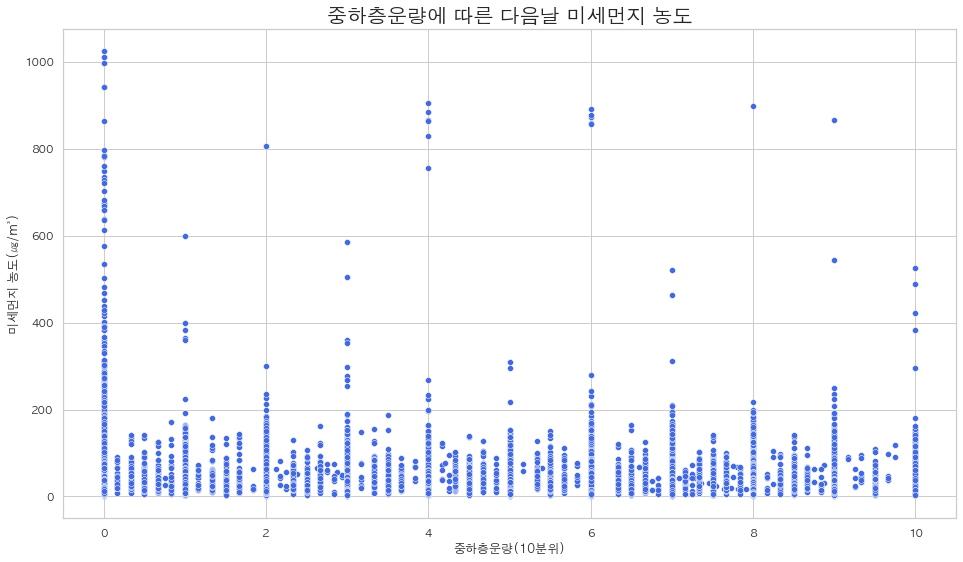

In [326]:
plt.figure(figsize = (16,9))

sns.scatterplot(x = "dc10LmcsCa", y = "PM10_y", data = df, color = "royalblue")

plt.title("중하층운량에 따른 다음날 미세먼지 농도", fontsize = 20)

plt.xlabel("중하층운량(10분위)")
plt.ylabel("미세먼지 농도(㎍/m³)")

plt.show()

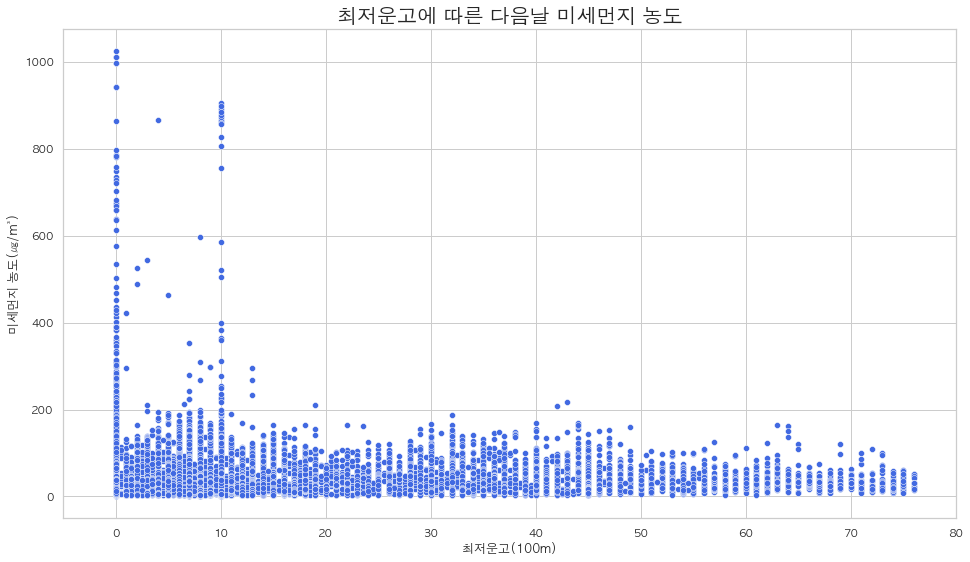

In [327]:
plt.figure(figsize = (16,9))

sns.scatterplot(x = "lcsCh", y = "PM10_y", data = df, color = "royalblue")

plt.title("최저운고에 따른 다음날 미세먼지 농도", fontsize = 20)

plt.xlabel("최저운고(100m)")
plt.ylabel("미세먼지 농도(㎍/m³)")

plt.xlim(-5,80)

plt.show()

- 전운량과 중하층운량에서 볼 수 있듯이, 운량은 미세먼지 농도에 영향을 주지 않음
- 최고 운고는 낮을 수록 다음날 미세먼지 농도가 낮음

## 시정과 PM10_y

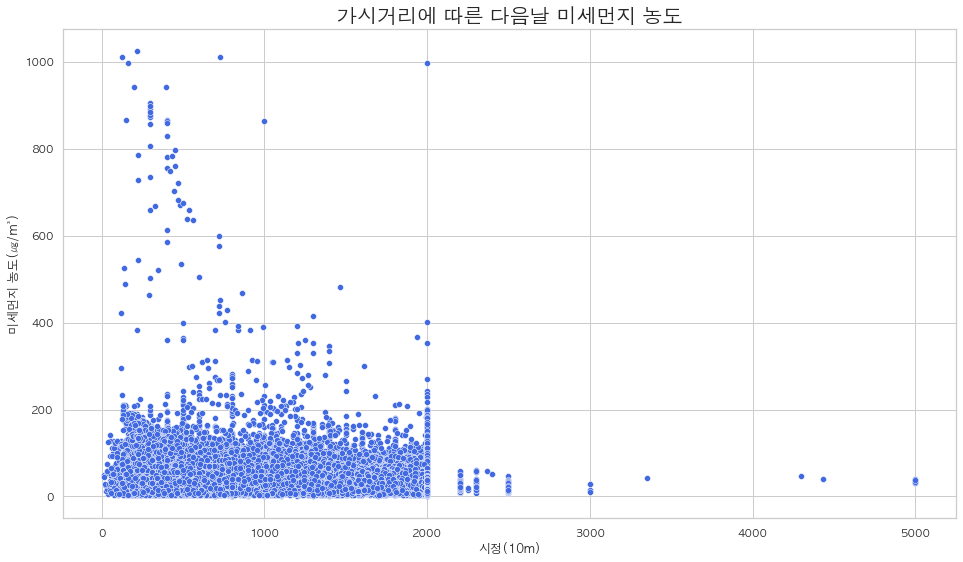

In [328]:
plt.figure(figsize=(16,9))

sns.scatterplot(x = "vs", y = "PM10_y", data = df, color = "royalblue")

plt.title("가시거리에 따른 다음날 미세먼지 농도", fontsize = 20)

plt.xlabel("시정(10m)")
plt.ylabel("미세먼지 농도(㎍/m³)")

plt.show()

# 서울시 대기오염

## 대기오염물질들과 PM10_y

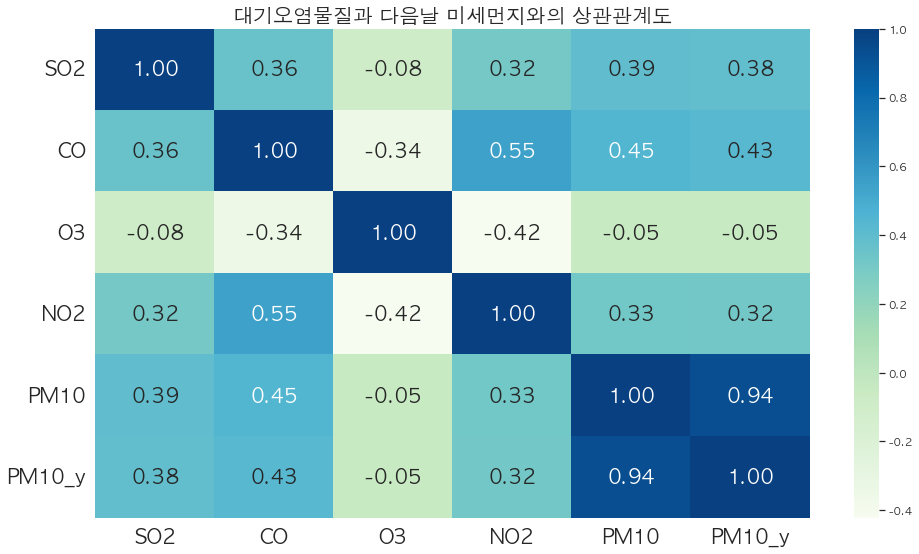

In [329]:
plt.figure(figsize=(16,9))

sns.heatmap(df[["SO2", "CO", "O3", "NO2", "PM10","PM10_y"]].corr(method = "kendall"), 
            annot = True, 
            fmt = ".2f", 
            cmap = "GnBu",
            annot_kws={"size": 20},
           )

plt.title("대기오염물질과 다음날 미세먼지와의 상관관계도", fontsize = 20)

plt.yticks(
    fontsize = 20,
    rotation = "horizontal"
)


plt.xticks(
    fontsize = 20
)

plt.show()

## 대기오염 연도별 추이

In [330]:
groupbyYear_mean

,year,SO2,CO,O3,NO2,PM10,ta,rn,ws,wd,...,day,hour,weekday,quarter,PM10_y,pm10_y_bin,good,normal,bad,verybad
0,2015,0.005392,0.568566,0.022082,0.036113,44.475055,13.444526,0.092095,2.627894,184.801116,...,15.720548,10.222222,3.000000,2.509589,44.475055,1.753932,0.342770,0.572298,0.073161,0.011771
1,2016,0.004607,0.547470,0.021748,0.035916,46.997031,13.429427,0.113580,2.237745,200.304594,...,15.756831,10.222222,3.008197,2.505464,46.997031,1.850030,0.244080,0.667679,0.082372,0.005869
2,2017,0.003819,0.507813,0.024574,0.035167,40.273650,12.898884,0.147641,2.165644,199.403531,...,15.720548,10.222222,3.008219,2.509589,40.273650,1.648605,0.420700,0.513445,0.062405,0.003450
3,2018,0.003478,0.512006,0.024055,0.031041,35.984107,12.833790,0.144242,1.702456,199.076611,...,15.720548,10.222222,2.991781,2.509589,35.984107,1.646068,0.439675,0.483714,0.067478,0.009132
4,2019,0.003401,0.507493,0.025949,0.032149,37.469626,13.432816,0.097717,1.919011,211.785895,...,15.720548,10.222222,2.994521,2.509589,37.469626,1.503805,0.524505,0.448706,0.025266,0.001522
5,2020,0.002901,0.479952,0.023549,0.024407,35.514975,13.121392,0.185175,2.323639,196.754706,...,15.756831,10.222222,2.997268,2.505464,35.514975,1.660089,0.447986,0.456284,0.083384,0.012346
6,2021,0.003330,0.475522,0.025760,0.027063,41.655139,13.588798,0.143511,2.272187,170.197869,...,15.720548,10.222222,3.002740,2.509589,41.655139,1.427905,0.602841,0.369356,0.024860,0.002943
7,2022,0.003386,0.433639,0.033346,0.022793,29.901456,14.307270,0.228151,2.393873,196.819082,...,15.703704,10.222222,2.995885,1.884774,29.901456,1.123932,0.124981,0.017680,0.000000,0.000000


In [334]:
log_groupbyYear_mean_pollution = np.log(groupbyYear_mean[["SO2","CO","O3","NO2"]])

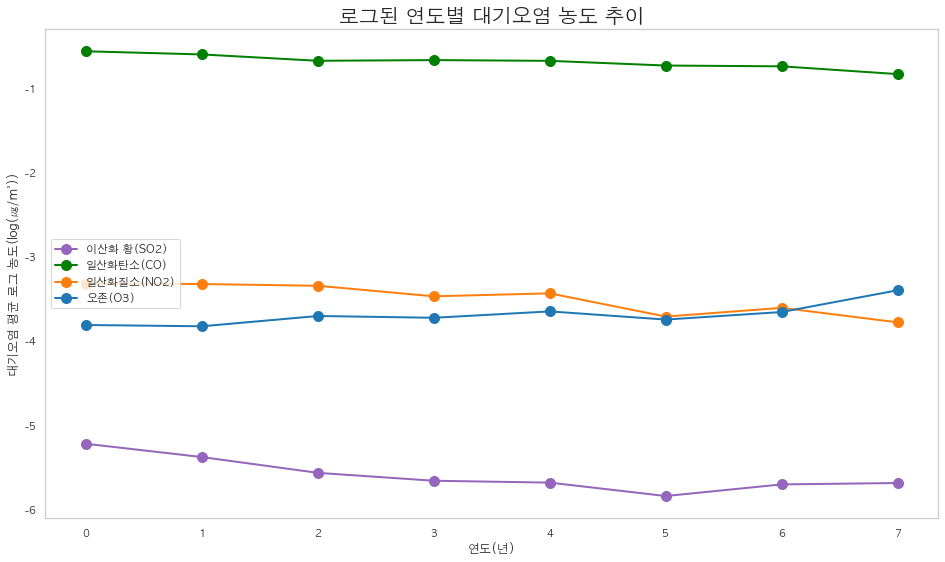

In [335]:
# 그래프 객체 생성
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(1,1,1)

plt.plot(log_groupbyYear_mean_pollution["SO2"], marker = 'o', markersize = 10, 
         markerfacecolor = "#9467bd", color = "#9467bd", linewidth = 2, label = "이산화 황(SO2)")

plt.plot(log_groupbyYear_mean_pollution["CO"], marker = 'o', markersize = 10, 
         markerfacecolor = "green", color = "green", linewidth = 2, label = "일산화탄소(CO)")

plt.plot(log_groupbyYear_mean_pollution["NO2"], marker = 'o', markersize = 10, 
         markerfacecolor = "#ff7f0e", color = "#ff7f0e", linewidth = 2, label = "일산화질소(NO2)")

plt.plot(log_groupbyYear_mean_pollution["O3"], marker = 'o', markersize = 10, 
         markerfacecolor = "#1f77b4", color = "#1f77b4", linewidth = 2, label = "오존(O3)")

plt.legend(loc = "center left")

# 차트 제목 추가
ax.set_title("로그된 연도별 대기오염 농도 추이", size = 20)

# 축 이름 추가
ax.set_xlabel("연도(년)", size = 12)
ax.set_ylabel("대기오염 평균 로그 농도(log(㎍/m³))", size = 12)


#축 눈금 라벨 크기
ax.tick_params(axis = "x", labelsize = 10)
ax.tick_params(axis = "y", labelsize = 10)

plt.grid(False)

plt.show()